## Object Detection 주요 Dataset

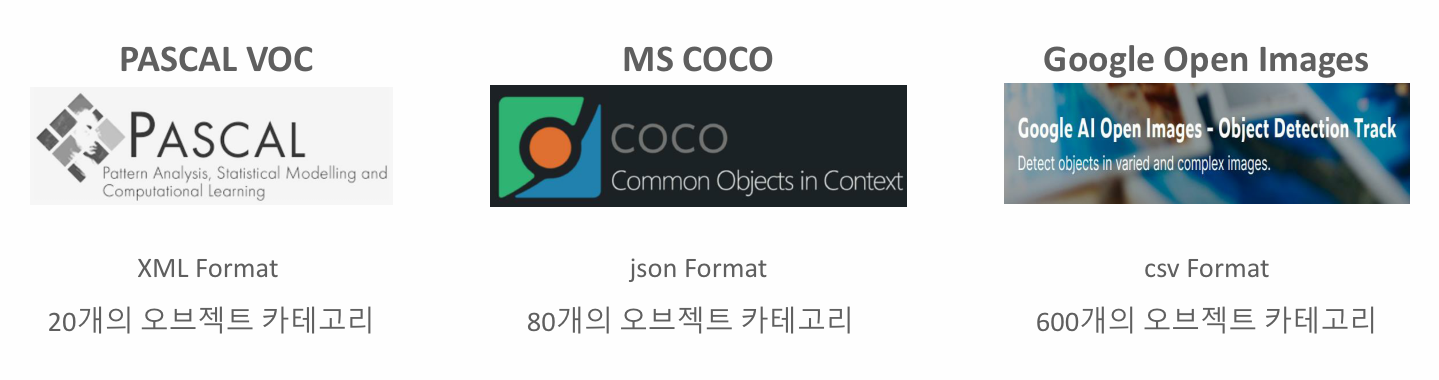

### PASCAL VOC 2012 데이터 다운로드 받기  : (1.86GB)
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

http://host.robots.ox.ac.uk/pascal/VOC/voc2012

#### PASCAL VOC 2012 <br>

* 20개의 class <br>
Person: person <br>
Animal: bird, cat, cow, dog, horse, sheep <br>
Vehicle: aeroplane, bicycle, boat, bus, car, motorbike, train <br>
Indoor: bottle, chair, dining table, potted plant, sofa, tv/monitor <br>

[1] Classification/Detection Competitions <br>
[2] Segmentation Competition <br>
[3] Action Classification Competition <br>
[4] ImageNet Large Scale Visual Recognition Competition

In [1]:
# ! wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# ! tar -xvf VOCtrainval_11-May-2012.tar  .

In [ ]:
# PASCAL VOC 2012 데이터 설명  : 각 디렉토리에 17,125개씩 
# VOCdevkit
#   |__ VOC2012
#          |__ Annotations : xml ,한 개의 image에 대한 설명
#          |__ ImageSets : 매핑정보
#          |__ JPEGImages : 원본 이미지 , 17125개
#          |__ SegmentationClass : Sematic Segmentation에 사용될 masking 이미지
#          |__ SegmentationObject : Instance Segmentation에 사용될 masking 이미지            

- detection: classification + localizaiton 
    - classification Dataset: 클래스로 이름으로 된 폴더별로 이미지
    - localization Dataset:이미지 한장에 좌표값과 클래스
        - Annotation
           - json ,csv ,xml 파일
              - Image info : width, height, depth, name, pose 
              - 좌표값 4개 : xmin,ymin,xmax,ymax

#### JPEGImages 디렉토리에 있는 임의의 이미지 보기  (17,125개 이미지)

img shape: (281, 500, 3)


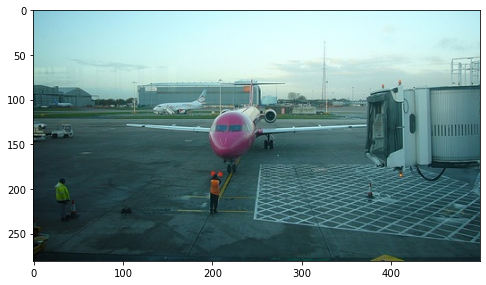

In [9]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:',img.shape)  # (281, 500, 3)

plt.figure(figsize=(8,8))
plt.imshow(img_rgb)
plt.show()

### Annotaion 파일 읽어오기

In [12]:
f = open('VOCdevkit/VOC2012/Annotations/2007_000032.xml')
line = f.readline()
while line:
    print(line, end='')
    line = f.readline()

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

### SegmentationObject 디렉토리의  masking image 파일 읽어오기

img shape: (281, 500, 3)


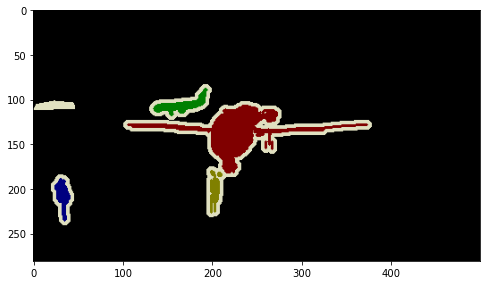

In [13]:
img = cv2.imread('VOCdevkit/VOC2012/SegmentationObject/2007_000032.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('img shape:', img.shape)

plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.show()

### Annotation xml 파일에 있는 요소들을 파싱하여 접근하기

In [16]:
import os
import random

VOC_ROOT_DIR ="VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)                       
print(xml_files[:5])
print(len(xml_files))  # 17125개

['2007_000027.xml', '2007_000032.xml', '2007_000033.xml', '2007_000039.xml', '2007_000042.xml']
17125


In [23]:
# !pip install lxml
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()

# image 관련 정보는 root의 자식으로 존재
image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR,image_name)

image_size = root.find('size')
image_width = int(image_size.find('width').text)    # image의 width
image_height = int(image_size.find('height').text)  # image의 height

# 모든 object Element 를 찾음
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('xmax').text)
    
    bndbox_pos = (x1,x2,y1,y2)
    
    class_name = obj.find('name').text
    object_dict = {'class_name':class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n','image_size:',(image_width,image_height))    

for obj in objects_list:
    print(obj)

full_image_name: VOCdevkit/VOC2012/JPEGImages\2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 375, 78, 375)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 197, 88, 197)}
{'class_name': 'person', 'bndbox_pos': (195, 213, 180, 213)}
{'class_name': 'person', 'bndbox_pos': (26, 44, 189, 44)}


#### Annotation 파일의 정보를 사용하여 Bounding box 시각화

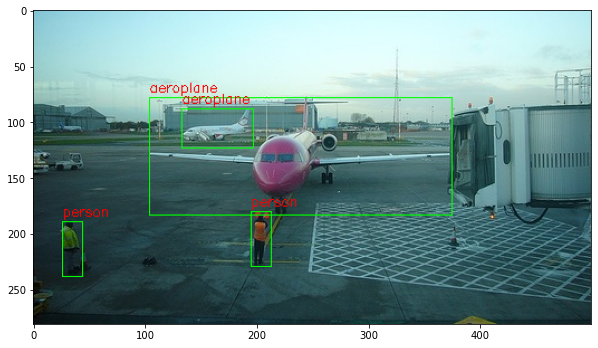

In [26]:
import cv2
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(IMAGE_DIR,image_name)

img = cv2.imread(full_image_name)

draw_img = img.copy()

green_color = (0,255,0)
red_color = (0,0,255)

objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name = obj.find('name').text
    
    # Bounding Box 그리기
    cv2.rectangle(draw_img,(left,top),(right,bottom),color=green_color,thickness=1)
    
    # class name 출력
    cv2.putText(draw_img,class_name, (left,top - 5), cv2.FONT_HERSHEY_SIMPLEX,0.4,red_color,thickness=1)
    
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.show()